In [20]:
import pandas as pd
from matplotlib import pyplot as plt

In [21]:
sessions = pd.read_csv('sessions.csv')
sessions = sessions.fillna(0)

# reformat dates
sessions['date'] = pd.to_datetime(sessions.date)

In [22]:
sessions.columns

Index(['date', 'monkey', 'cycle', 'phase', 'location', 'mood', 'rm', 'stable',
       'max_full', 'total', 'total6', '4', '5a', '5b', '5c', '6a', '6a+', '6b',
       '6b+', '6c', '6c+', '7a', '7a+', '7b', '7b+', '7c', '7c+', '8a'],
      dtype='object')

In [23]:
sessions.head()

,date,monkey,cycle,phase,location,mood,rm,stable,max_full,total,...,6b+,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a
0,2018-03-25,doripa,1,marathon,bb1,0.0,0.95,6a,6b+,42.00,...,4.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-03-25,sunshine,1,marathon,bb1,0.0,0.95,5c,6b+,42.00,...,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-03-27,doripa,1,technique,bf,0.0,0.60,6b,6b+,25.75,...,2.0,0.25,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0
3,2018-03-29,doripa,1,4x4,bb2,0.0,0.50,6b,6b,24.00,...,0.0,0.00,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-03-29,sunshine,1,4x4,bb2,0.0,0.50,5c,6a+,12.50,...,0.0,0.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
scores_translator = {
    '4': 4,
    '5a': 8,
    '5b': 9,
    '5c': 10,
    '6a': 20,
    '6a+': 21,
    '6b': 30,
    '6b+': 40,
    '6c': 41,
    '6c+': 42,
    '7a': 80,
    '7a+': 81,
}

def calc_score(row):
    s = [row[key] * scores_translator[key] for key in scores_translator]
    return sum(s)



In [25]:
scores = sessions.apply(calc_score, axis=1)
sessions['scores'] = scores
sessions

,date,monkey,cycle,phase,location,mood,rm,stable,max_full,total,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
0,2018-03-25,doripa,1,marathon,bb1,0.0,0.95,6a,6b+,42.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1012.00
1,2018-03-25,sunshine,1,marathon,bb1,0.0,0.95,5c,6b+,42.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,556.00
2,2018-03-27,doripa,1,technique,bf,0.0,0.60,6b,6b+,25.75,...,0.25,0.00,0.0,1.5,0.0,0.0,0.0,0.0,0.0,493.75
3,2018-03-29,doripa,1,4x4,bb2,0.0,0.50,6b,6b,24.00,...,0.00,0.50,0.5,0.0,0.0,0.0,0.0,0.0,0.0,426.00
4,2018-03-29,sunshine,1,4x4,bb2,0.0,0.50,5c,6a+,12.50,...,0.00,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,184.00
5,2018-03-31,doripa,1,project,bf,0.0,0.60,6b,6b+,40.75,...,0.00,0.25,0.5,0.0,0.0,0.0,0.0,0.0,0.0,617.50
6,2018-02-04,doripa,1,project,bb1,0.0,0.40,6b,6c+,30.25,...,0.00,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,668.50
7,2018-04-04,doripa,1,project,bf,0.0,0.40,6b,6c,20.00,...,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,602.00
8,2018-06-04,doripa,1,arc,bf,0.0,0.20,5c,5c,29.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.00
9,2018-06-04,doripa,1,project,bb2,0.0,0.50,6b,6c+,39.00,...,5.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,948.00


In [26]:
doripa = sessions[sessions.monkey == 'doripa']
sunshine_sessions = sessions[sessions.monkey == 'sunshine']

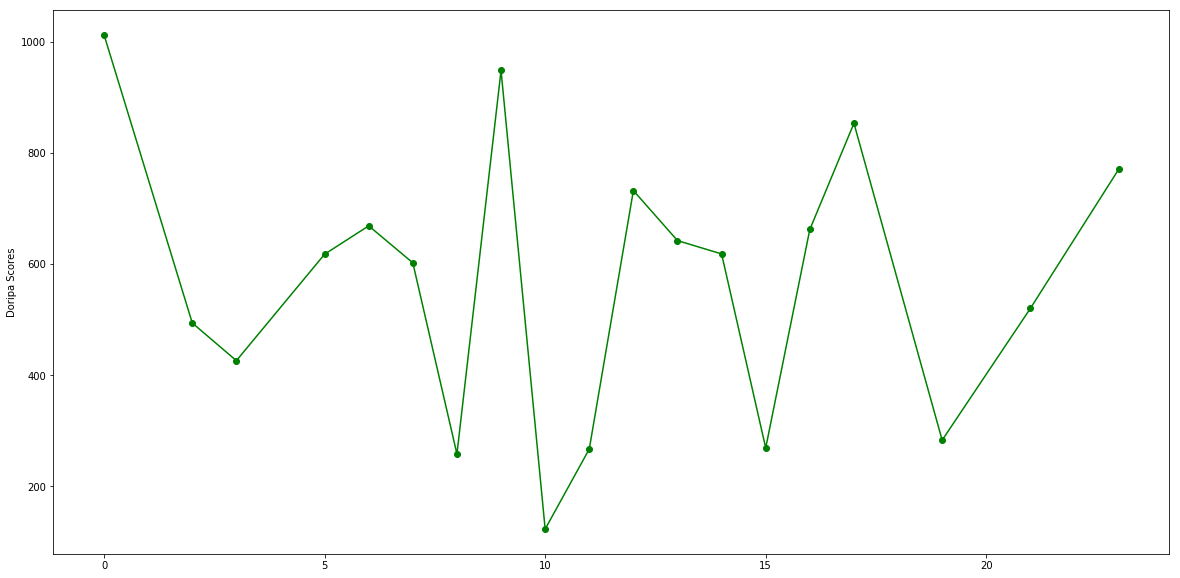

In [34]:
plt.figure(figsize=(20,10))
plt.plot(doripa.scores, marker='o', color='green')
plt.ylabel('Doripa Scores')
plt.show()

In [28]:
sunshine_sessions

,date,monkey,cycle,phase,location,mood,rm,stable,max_full,total,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
1,2018-03-25,sunshine,1,marathon,bb1,0.0,0.95,5c,6b+,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,556.0
4,2018-03-29,sunshine,1,4x4,bb2,0.0,0.50,5c,6a+,12.5,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,184.0
18,2018-04-28,sunshine,2,base,bb1,0.0,0.60,5c,6a+,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0
20,2018-01-05,sunshine,2,base,bf,6.0,0.60,5a,5c,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0
22,2018-03-05,sunshine,2,base,bb2,7.0,0.65,5c,6a,16.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247.0


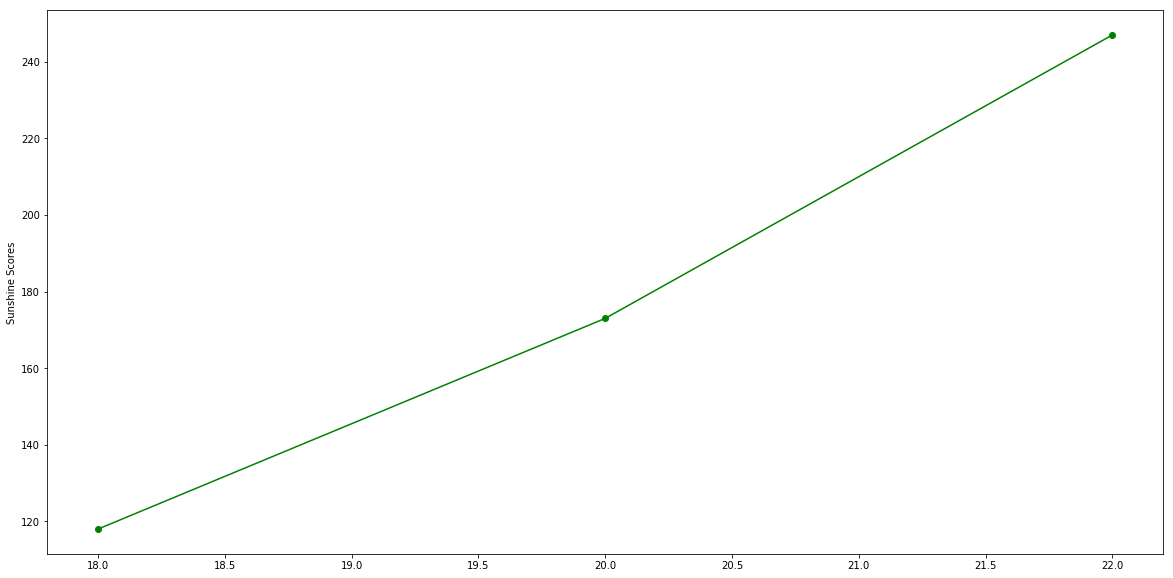

In [35]:
plt.figure(figsize=(20,10))
plt.plot(sunshine_sessions[sunshine_sessions.cycle == 2].scores,  marker='o', color='green')
plt.ylabel('Sunshine Scores')
plt.show()

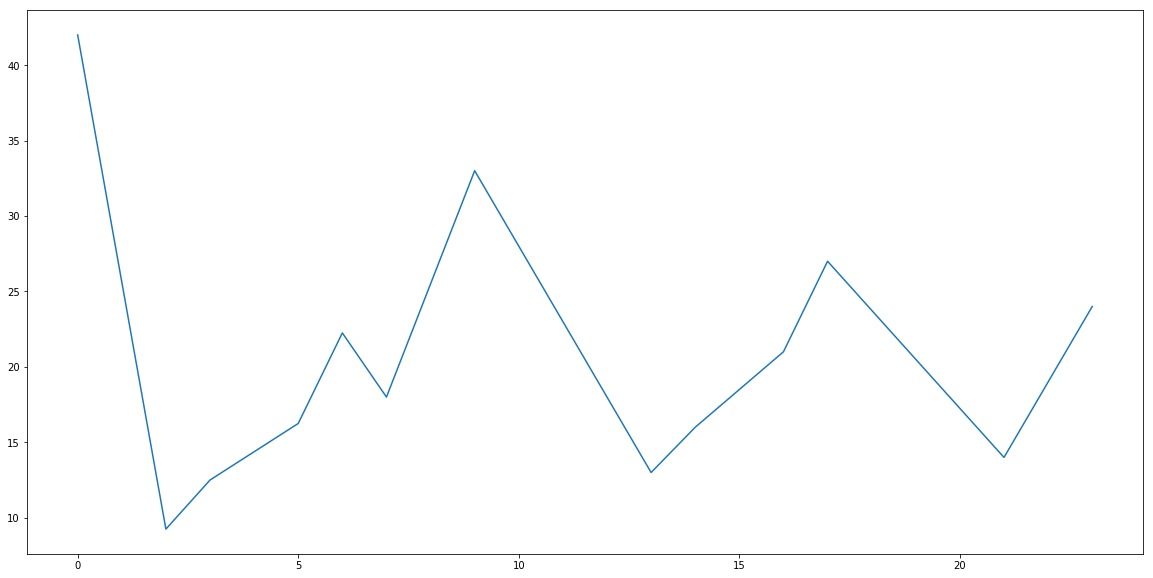

In [30]:
no_arcing = doripa[doripa.phase != 'arc']
plt.figure(figsize=(20,10))
plt.plot(no_arcing['total6'])
plt.show()

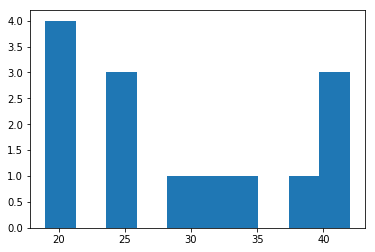

In [31]:
plt.hist(no_arcing['total'])
plt.show()